<a href="https://colab.research.google.com/github/asgharlaib/Project_v1/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
full_df = pd.read_csv("/content/drive/MyDrive/CC_LCL-FullData.csv")
full_df.head(n=10)

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0
5,MAC000002,Std,2012-10-12 03:00:00.0000000,0
6,MAC000002,Std,2012-10-12 03:30:00.0000000,0
7,MAC000002,Std,2012-10-12 04:00:00.0000000,0
8,MAC000002,Std,2012-10-12 04:30:00.0000000,0
9,MAC000002,Std,2012-10-12 05:00:00.0000000,0


In [ ]:
full_df_copy = full_df.copy()

In [ ]:
print(f"full_df columns datatypes: {full_df.dtypes} \n")

full_df columns datatypes: LCLid                      object
stdorToU                   object
DateTime                   object
KWH/hh (per half hour)     object
dtype: object 



In [ ]:
full_df['DateTime'] = pd.to_datetime(full_df['DateTime'])

print(f"full_df columns datatypes: {full_df.dtypes} \n")

full_df columns datatypes: LCLid                              object
stdorToU                           object
DateTime                   datetime64[ns]
KWH/hh (per half hour)             object
dtype: object 



In [ ]:
df_8am = full_df[full_df['DateTime'].dt.time == pd.to_datetime('08:00').time()]
print(df_8am.head)


<bound method NDFrame.head of                LCLid stdorToU            DateTime KWH/hh (per half hour) 
15         MAC000002      Std 2012-10-12 08:00:00                      0 
62         MAC000002      Std 2012-10-13 08:00:00                  0.146 
110        MAC000002      Std 2012-10-14 08:00:00                   0.13 
158        MAC000002      Std 2012-10-15 08:00:00                   0.12 
206        MAC000002      Std 2012-10-16 08:00:00                  0.144 
...              ...      ...                 ...                     ...
167932203  MAC005564      ToU 2014-02-23 08:00:00                  0.065 
167932251  MAC005564      ToU 2014-02-24 08:00:00                  0.042 
167932299  MAC005564      ToU 2014-02-25 08:00:00                  0.039 
167932347  MAC005564      ToU 2014-02-26 08:00:00                  0.074 
167932395  MAC005564      ToU 2014-02-27 08:00:00                  0.026 

[3493360 rows x 4 columns]>


In [ ]:
##Descriptive Analysis
#Dataframe column names
print(f"Column names: {list(df_8am.columns)} \n")

#Dataframe shape
print(f"df_8am shape: {df_8am.shape} \n")

#Dataframe datatypes
print(f"df_8am columns datatypes: {df_8am.dtypes} \n")

#Looking for missing values
print(f"missing values: {df_8am.isnull().sum()} \n")

Column names: ['LCLid', 'stdorToU', 'DateTime', 'KWH/hh (per half hour) '] 

df_8am shape: (3493360, 4) 

df_8am columns datatypes: LCLid                              object
stdorToU                           object
DateTime                   datetime64[ns]
KWH/hh (per half hour)             object
dtype: object 

missing values: LCLid                      0
stdorToU                   0
DateTime                   0
KWH/hh (per half hour)     0
dtype: int64 



In [ ]:
##Descriptive Statistics
df_8am.describe()

,DateTime
count,3493360
mean,2013-03-28 07:12:10.717475328
min,2011-11-24 08:00:00
25%,2012-10-22 08:00:00
50%,2013-03-30 08:00:00
75%,2013-09-10 08:00:00
max,2014-02-27 08:00:00


Text(0.5, 1.0, 'Standard vs Dynamic Time of Use Distribution')

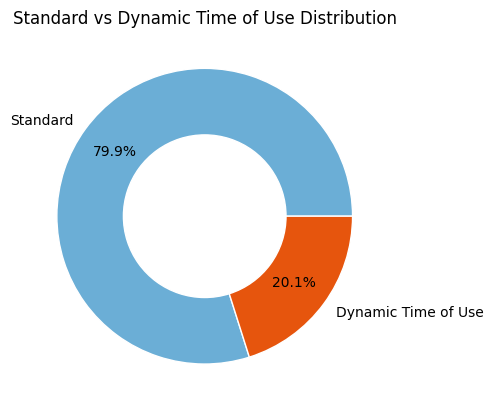

In [ ]:
# EDA: Pie chart:
fig, ax = plt.subplots()
cmap = plt.colormaps["tab20c"]
outer_colors = cmap([1,4])
inner_colors = cmap([7,8,7,8])
size = 0.45
pctdist = 0.75

# Counts of households in std or ToU pricing Scheme
total_number = df_8am['stdorToU'].value_counts()

# Pie Chart to show distribution
ax.pie(
    np.array(total_number),
    autopct='%1.1f%%',
    pctdistance = pctdist,
    radius=1.0,
    colors=outer_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=['Standard','Dynamic Time of Use']
);
plt.title("Standard vs Dynamic Time of Use Distribution")
